
2nd advection
3rd dispersion transport

boundary condition right side-von Neumanncondition
water inflowing = water outflowing

c0 = m/v = m / (w * d* dx)

first boundary condition C on the borders is alway 0

mass conservation law(if the total mass of the tracer present in the river is constant in time)

In [39]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
#Parameters of the physical object:
l = 100
w = 5 
d = 1 #depth

mean_flow_velocity = 0.1
dispersion_coefficient = 0.01
injection_point = 10 #location of the injection point
measurement_point = 90 #location of the measurement point
amount_of_injected_tracer = 1 #amount of injected tracer

#input
dx = 1e-2
dt = 1e-2
t_sim = 10
nx = int(l/dx)
nt = int(t_sim/dt)

f'nx = {nx}, nt = {nt}'


'nx = 10000, nt = 1000'

In [66]:
ca = mean_flow_velocity * dt / dx
cd = dispersion_coefficient * dt / np.square(dx)
f'ca = {ca}, cd = {cd}'

'ca = 0.1, cd = 1.0'

In [67]:
def quickest(c, c_r, c_l, c_ll):
    a0 = (cd * (1 - ca) - (ca / 6) * (np.square(ca) - 3 * ca + 2))
    a1 = (cd * (2 - 3 * ca) - (ca / 2) * (np.square(ca) - 2 * ca - 1))
    a2 = (cd * (1 - 3 * ca) - (ca / 2) * (np.square(ca) - ca - 2))
    a3 = (cd * ca + (ca / 6) * (np.square(ca) - 1))
    c_next = c + a0 * c_r - a1 * c + a2 * c_l + a3 * c_ll 
    return c_next

In [68]:
#initial condition
#m- initial concentration in the injection point
c = np.zeros(nx)
m = amount_of_injected_tracer / (w * d* dx)
c[int(injection_point / dx)] = m

In [69]:
def make_plot(c, x):
    sns.lineplot(x, c)
    plt.show()

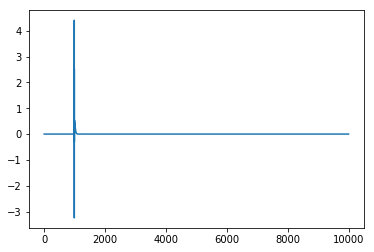

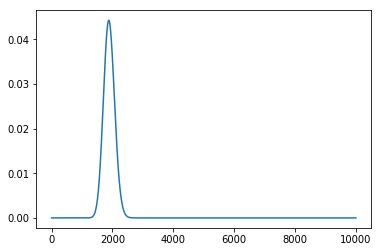

In [70]:
xm = int(measurement_point / dx)
flow_sum = 0
x = np.arange(0, nx)
t = np.arange(0, nt)
measure_c = []
for i in t:
    for j in range(2, nx - 2):
        c[j] = quickest(c[j], c[j+1], c[j-1], c[j-2])
    measure_c.append(c[xm])
    c[nx - 1] = c[nx - 2] #right side-von Neumanncondition
    if i == 10 or i == nt - 1:
        make_plot(c, x)

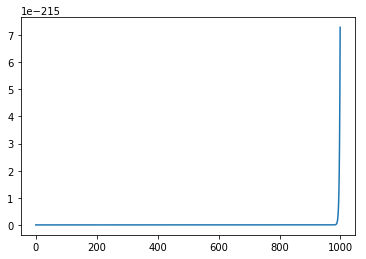

In [62]:
make_plot(measure_c, t)

In [72]:
sum(measure_c)/(w * d* dx)

1.033663959925121e-135